# 1. Library Imports

In [1]:
import string
import re
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import certifi
import os

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

os.environ["SSL_CERT_FILE"] = certifi.where()

# 2. Dataset imports

In [2]:
df_good =  pd.read_csv('Data/good_movie_reviews.csv', parse_dates=['date']) 
df_bad = pd.read_csv('Data/bad_movie_reviews.csv', parse_dates=['date'])

print('Amount of registries from good movies: ', df_good.shape[0])
print('Amount of registries from bad movies: ', df_bad.shape[0])

Amount of registries from good movies:  7229
Amount of registries from bad movies:  7259


# 3. Filters

- Year between 2022 and 2023
- Only english comments (en)
- Keep only the comments column
- Concatenate both data frames (Union)

In [3]:
df_good_filtered = df_good.query('date.dt.year >= 2022 and date.dt.year <= 2023 and language == "en"')[['comments']]
df_bad_filtered = df_bad.query('date.dt.year >= 2022 and date.dt.year <= 2023 and language == "en"')[['comments']]

In [4]:
df_reviews = pd.concat([df_good_filtered, df_bad_filtered])

print('Amount of registries from all movies: ', df_reviews.shape[0])

Amount of registries from all movies:  14480


# 4. Ploting the first wordcloud

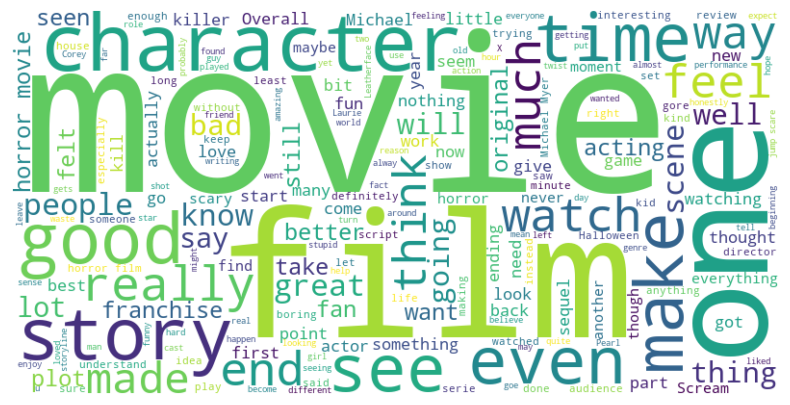

In [5]:
# Concatenate all text from the 'text_column'
text = " ".join(df_reviews['comments'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Turn off axis labels
plt.show()

# 5. Cleaning process

## 5.1. Punctuation

In [6]:
# Function to remove punctuation from a string
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [7]:
# Apply the function to the 'text' column
df_reviews['comments'] = df_reviews['comments'].apply(remove_punctuation)

In [8]:
df_reviews

,comments
0,Talk to Me is a stone cold classic of the horr...
1,A group of youngsters discover that by taking ...
2,Danny and Michael Philippou have truly made so...
3,I watched Talk to Me early as part of Regals M...
4,The premise was what initially drew me to this...
...,...
7254,I tought Im gonna be giving it 810 stars while...
7255,We have no context for the boogeyman what it a...
7256,Honestly 1010 horror movie I watch A LOT of ho...
7257,Too much too fast ZERO CONTEXT I dont want to ...


## 5.2. Emojis

In [9]:
# Function to remove emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251" 
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [10]:
# Apply the function to the 'text' column
df_reviews['comments'] = df_reviews['comments'].apply(remove_emojis)

In [11]:
df_reviews

,comments
0,Talk to Me is a stone cold classic of the horr...
1,A group of youngsters discover that by taking ...
2,Danny and Michael Philippou have truly made so...
3,I watched Talk to Me early as part of Regals M...
4,The premise was what initially drew me to this...
...,...
7254,I tought Im gonna be giving it 810 stars while...
7255,We have no context for the boogeyman what it a...
7256,Honestly 1010 horror movie I watch A LOT of ho...
7257,Too much too fast ZERO CONTEXT I dont want to ...


## 5.3. Numbers

In [12]:
# Remove numbers from the columns using str.replace()
df_reviews['comments'] = df_reviews['comments'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))

In [13]:
df_reviews

,comments
0,Talk to Me is a stone cold classic of the horr...
1,A group of youngsters discover that by taking ...
2,Danny and Michael Philippou have truly made so...
3,I watched Talk to Me early as part of Regals M...
4,The premise was what initially drew me to this...
...,...
7254,I tought Im gonna be giving it stars while wa...
7255,We have no context for the boogeyman what it a...
7256,Honestly horror movie I watch A LOT of horror...
7257,Too much too fast ZERO CONTEXT I dont want to ...


## 5.4. Special Charaters

In [14]:
# Apply the function to the 'text' column
df_reviews['comments'] = df_reviews['comments'].str.replace('[^a-zA-Z0-9\s]|\\r\\n', '', regex=True)

In [15]:
df_reviews

,comments
0,Talk to Me is a stone cold classic of the horr...
1,A group of youngsters discover that by taking ...
2,Danny and Michael Philippou have truly made so...
3,I watched Talk to Me early as part of Regals M...
4,The premise was what initially drew me to this...
...,...
7254,I tought Im gonna be giving it stars while wa...
7255,We have no context for the boogeyman what it a...
7256,Honestly horror movie I watch A LOT of horror...
7257,Too much too fast ZERO CONTEXT I dont want to ...


## 5.5. White spaces and lower casing

In [16]:
df_reviews = df_reviews.assign(comments = lambda x: x.comments.str.lower().str.strip())

df_reviews

,comments
0,talk to me is a stone cold classic of the horr...
1,a group of youngsters discover that by taking ...
2,danny and michael philippou have truly made so...
3,i watched talk to me early as part of regals m...
4,the premise was what initially drew me to this...
...,...
7254,i tought im gonna be giving it stars while wa...
7255,we have no context for the boogeyman what it a...
7256,honestly horror movie i watch a lot of horror...
7257,too much too fast zero context i dont want to ...


# 6. Ploting the second word cloud

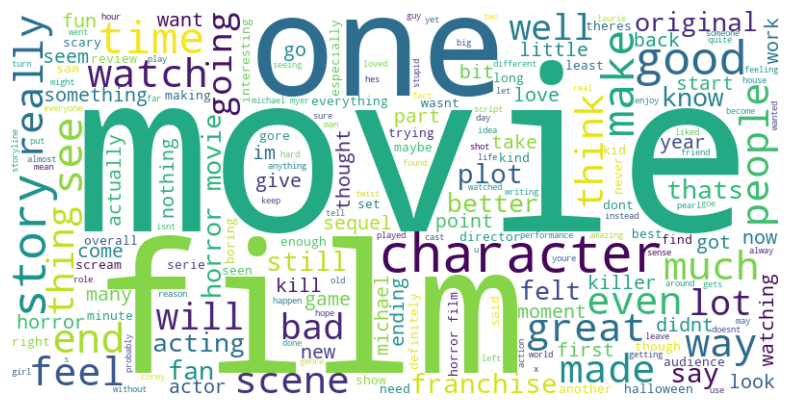

In [17]:
# Concatenate all text from the 'text_column'
text = " ".join(df_reviews['comments'])

# Create a WordCloud object
wordcloud_2 = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_2, interpolation='bilinear')
plt.axis("off")  # Turn off axis labels
plt.show()

# 7. Stop words

In this step I'll apply the standard stop word dictionary to retain the highest amount of information possible. If seen some of the words appear with a high frequency, it's possible to create and apply another custom list to remove only these extra ones.

In [18]:
# Download nltk resources
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DRT57226\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
stop_words = set(stopwords.words('english'))

In [20]:
# Define a function to remove stop words
def remove_stop_words(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

In [21]:
# Apply the function to the desired column
df_reviews['comments_stop'] = df_reviews['comments'].apply(remove_stop_words)

In [22]:
df_reviews.head()

,comments,comments_stop
0,talk to me is a stone cold classic of the horr...,talk stone cold classic horror genre feels fre...
1,a group of youngsters discover that by taking ...,group youngsters discover taking part small ri...
2,danny and michael philippou have truly made so...,danny michael philippou truly made something s...
3,i watched talk to me early as part of regals m...,watched talk early part regals mystery movie m...
4,the premise was what initially drew me to this...,premise initially drew film although different...


# 8. Ploting the third word cloud

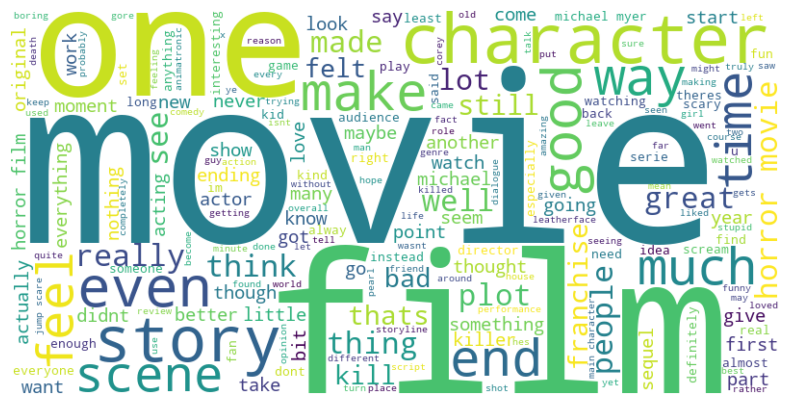

In [23]:
# Concatenate all text from the 'text_column'
text = " ".join(df_reviews['comments_stop'])

# Create a WordCloud object
wordcloud_3 = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_3, interpolation='bilinear')
plt.axis("off")  # Turn off axis labels
plt.show()

# 9. Export

In [24]:
df_reviews.to_csv('Data/cleaned_reviews.csv', index=False)